# Import packeges:

In [73]:
# Import required packages
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.decomposition import PCA
import pylab as pl
from matplotlib import collections  as mc
from mpl_toolkits.mplot3d import Axes3D
import pickle
from datetime import date
import codecs
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 7.5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Load dataset:

In [3]:
df_data_1 = pd.read_csv("../common/albertom/new_data/dataset1.csv")
df_data_1

,Unnamed: 0,SHOP_JUL,PAY_JUL,SHOP_AUG,PAY_AUG,SHOP_SEP,PAY_SEP,SHOP_OCT,PAY_OCT,SHOP_NOV,PAY_NOV,SHOP_DEC,PAY_DEC,SEX,EDUCATION,MARRIAGE,BIRTH_DATE,DEFAULT PAYMENT JAN
0,53613503,548.629867,0,20.839706,2,29.873227,0,21.376351,0,29.783786,0,1.121617e+03,0,M,university,single,NaN,0
1,35524089,-14.399969,-2,11.627304,0,536.644800,0,2633.226593,0,68.720348,0,4.889430e+01,0,M,university,married,04/01/1983,1
2,58777007,-49.162626,-2,0.000000,-2,0.000000,-1,47.165115,-1,2275.672088,0,6.681228e+01,0,F,high school,married,02/01/1975,0
3,26913418,36.760169,-2,115.617141,-2,88.844528,-2,216.983381,-2,80.794856,-2,8.887434e+01,-2,F,graduate school,married,15/01/1977,0
4,41993633,0.000000,-1,569.439760,-1,0.000000,-1,29.813600,-1,119.254400,-1,2.921733e+01,-1,F,graduate school,married,09/01/1978,1
5,46414261,1683.693246,0,27.816089,0,26.355222,0,735.203376,0,91.557566,0,5.503591e+01,2,M,university,single,27/01/1989,1
6,10438751,607.273218,0,14.250901,0,46.509216,0,9.033521,0,47.194929,2,5.622845e+01,1,M,university,married,08/01/1985,1
7,19267237,-277.087598,0,34.285640,0,112.158763,-1,153.152463,-1,395.089827,-1,1.595624e+02,-1,F,university,single,16/01/1983,0
8,39470148,462.080986,0,607.034710,0,-451.139395,0,760.306427,0,58.196148,0,3.610427e+01,2,M,university,single,07/01/1992,1
9,24381216,692.748810,0,95.761283,0,202.195835,0,254.846653,0,140.809633,0,5.450522e+02,0,F,university,married,19/01/1992,1


In [118]:
df_data_1.groupby(['SEX', 'EDUCATION', 'MARRIAGE', 'DEFAULT PAYMENT JAN']).count()

Unnamed: 0  CUM_SHOP_JUL  \
SEX EDUCATION       MARRIAGE DEFAULT PAYMENT JAN                             
F   graduate school married  0                          1461          1461   
                             1                           342           342   
                    other    0                            12            12   
                             1                             2             2   
                    single   0                          3042          3042   
                             1                           672           672   
    high school     married  0                          1206          1206   
                             1                           398           398   
                    other    0                            49            49   
                             1                            15            15   
                    single   0                           687           687   
                             1                           205           205   
    other           married  0                            30            30   
                             1                             1             1   
                    other    0                             2             2   
                    single   0                            41            41   
                             1                             2             2   
    university      married  0                          3063          3063   
                             1                           909           909   
                    other    0                            65            65   
                             1                            22            22   
                    single   0                          2826          2826   
                             1                           786           786   
M   graduate school married  0                          1160          1160   
                             1                           345           345   
                    other    0                            16            16   
                             1                             9             9   
                    single   0                          1913          1913   
                             1                           441           441   
    high school     married  0                           654           654   
                             1                           267           267   
                    other    0                            23            23   
                             1                            11            11   
                    single   0                           607           607   
                             1                           198           198   
    other           married  0                            13            13   
                             1                             2             2   
                    single   0                            17            17   
                             1                             2             2   
    university      married  0                          1525          1525   
                             1                           568           568   
                    other    0                            40            40   
                             1                            19            19   
                    single   0                          1951          1951   
                             1                           647           647   

                                                  PAY_JUL  CUM_SHOP_AUG  \
SEX EDUCATION       MARRIAGE DEFAULT PAYMENT JAN                          
F   graduate school married  0                       1461          1461   
                             1                        342           342   
                    other    0                         12            12   
        

In [4]:
df_target = df_data_1[['DEFAULT PAYMENT JAN','Unnamed: 0']]

In [120]:
df_target.head()

,DEFAULT PAYMENT JAN,Unnamed: 0
0,0,53613503
1,1,35524089
2,0,58777007
3,0,26913418
4,1,41993633


In [5]:
# Add material ID as index of the DataFrame
df_data_1 = df_data_1.set_index(['Unnamed: 0'], drop=True)
df_data_1 = df_data_1.drop("DEFAULT PAYMENT JAN",1)
df_data_1.index.name = None
print(df_data_1.shape)
df_data_1.head()

(26884, 16)


,SHOP_JUL,PAY_JUL,SHOP_AUG,PAY_AUG,SHOP_SEP,PAY_SEP,SHOP_OCT,PAY_OCT,SHOP_NOV,PAY_NOV,SHOP_DEC,PAY_DEC,SEX,EDUCATION,MARRIAGE,BIRTH_DATE
53613503,548.629867,0,20.839706,2,29.873227,0,21.376351,0,29.783786,0,1121.617446,0,M,university,single,NaN
35524089,-14.399969,-2,11.627304,0,536.644800,0,2633.226593,0,68.720348,0,48.894304,0,M,university,married,04/01/1983
58777007,-49.162626,-2,0.000000,-2,0.000000,-1,47.165115,-1,2275.672088,0,66.812278,0,F,high school,married,02/01/1975
26913418,36.760169,-2,115.617141,-2,88.844528,-2,216.983381,-2,80.794856,-2,88.874342,-2,F,graduate school,married,15/01/1977
41993633,0.000000,-1,569.439760,-1,0.000000,-1,29.813600,-1,119.254400,-1,29.217328,-1,F,graduate school,married,09/01/1978


In [122]:
df_target.head()

,DEFAULT PAYMENT JAN,Unnamed: 0
0,0,53613503
1,1,35524089
2,0,58777007
3,0,26913418
4,1,41993633


In [123]:
df_data_1.describe()

,CUM_SHOP_JUL,PAY_JUL,CUM_SHOP_AUG,PAY_AUG,CUM_SHOP_SEP,PAY_SEP,CUM_SHOP_OCT,PAY_OCT,CUM_SHOP_NOV,PAY_NOV,CUM_SHOP_DEC,PAY_DEC
count,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000
mean,0.246838,-0.291884,0.261771,-0.264879,0.287883,-0.219052,0.320263,-0.166344,0.339094,-0.133313,0.352279,-0.016367
std,0.386993,1.150547,0.383730,1.135089,0.398136,1.171221,0.418377,1.197837,0.428751,1.197715,0.435154,1.123991
min,-4.517530,-2.000000,-4.396650,-2.000000,-4.231600,-2.000000,-4.036550,-2.000000,-3.825100,-2.000000,-3.619450,-2.000000
25%,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000956,-1.000000
50%,0.132385,0.000000,0.154802,0.000000,0.176861,0.000000,0.208258,0.000000,0.231129,0.000000,0.244365,0.000000
75%,0.520000,0.000000,0.540735,0.000000,0.596302,0.000000,0.676547,0.000000,0.719878,0.000000,0.747732,0.000000
max,2.341850,8.000000,4.752300,8.000000,4.462300,8.000000,4.374850,8.000000,5.456200,8.000000,5.309500,8.000000


# Plot visual correlations:

fig, axarr = plt.subplots(6, 2,figsize=(40, 40))
fig.suptitle("DEFAULT PAYMENT JAN distribution over features", fontsize=40)
colors = {0:'r', 1:'b'}

for index,col in enumerate(df_data_1.columns):
    if col != "SEX" and col != "EDUCATION" and col != "MARRIAGE" and col != "BIRTH_DATE" and col != "DEFAULT PAYMENT JAN":
        i = (index)%6
        j = (index)%2
        axarr[i,j].scatter(df_target["DEFAULT PAYMENT JAN"], df_data_1[col], c=df_target["DEFAULT PAYMENT JAN"].apply(lambda x: colors[x]))
        axarr[i,j].set_title(col, size=30)
        axarr[i,j].tick_params(labelsize=25)
    
fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

fig, axarr = plt.subplots(6, 2,figsize=(40, 40))
fig.suptitle("Faetures distribution in dataset", fontsize=40)

for index,col in enumerate(df_data_1.columns):
    if col != "SEX" and col != "EDUCATION" and col != "MARRIAGE" and col != "BIRTH_DATE" and col != "DEFAULT PAYMENT JAN":
        i = index%6
        j = index%2
        axarr[i,j].scatter(np.arange(1,df_data_1.shape[0]+1), df_data_1[col], c=df_target["DEFAULT PAYMENT JAN"].apply(lambda x: colors[x]))
        axarr[i,j].set_title(col, size=30)
        axarr[i,j].tick_params(labelsize=25)
    
fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

X = df_data_1

cols = ['CUM_SHOP_JUL', 'CUM_SHOP_AUG', 'CUM_SHOP_SEP', 'CUM_SHOP_OCT', 'CUM_SHOP_NOV', 'CUM_SHOP_DEC']
cols1 = ['CUM_PAY_JUL', 'CUM_PAY_AUG', 'CUM_PAY_SEP', 'CUM_PAY_OCT', 'CUM_PAY_NOV', 'CUM_PAY_DEC']
cols2 = ['SHOP_JUL_NET', 'SHOP_AUG_NET', 'SHOP_SEP_NET', 'SHOP_OCT_NET', 'SHOP_NOV_NET', 'SHOP_DEC_NET']
cols3 = ['SHOP_JUL', 'SHOP_AUG', 'SHOP_SEP', 'SHOP_OCT', 'SHOP_NOV', 'SHOP_DEC']

i = 1

ones_mask = (df_target['DEFAULT PAYMENT JAN'] == 1).values
zeros_mask = (df_target['DEFAULT PAYMENT JAN'] == 0).values

fig = plt.figure(figsize=(20, 6 * 4))
for col in cols3:
    ax = fig.add_subplot(3,6,i)
    i += 1
    ax.set_title(col)
    ones = X[col][ones_mask]
    zeros = X[col][zeros_mask]
    ax.hist((ones, zeros), histtype='barstacked', bins=30, label=('1', '0'), color=('r', 'b'))
    #ax.legend(loc='best')
plt.show()

# Drop / FillNaN :

In [440]:
# Drop noisy/useless/target features
def calculate_age(birth_date):
        today = date.today()
        age = today.year - birth_date.year
        full_year_passed = (today.month, today.day) < (birth_date.month, birth_date.day)
        if not full_year_passed:
            age -= 1
        return age
    
def fillNa(age):
    if np.isnan(age):
        return random.uniform(20,70)
    else:
        return age
    
df_data_1['BIRTH_DATE'] = pd.to_datetime(df_data_1['BIRTH_DATE'])    
df_data_1['AGE'] = df_data_1['BIRTH_DATE'].apply(lambda x: calculate_age(x))
df_data_11 = df_data_1.drop(["BIRTH_DATE"], 1)
df_data_11['AGE'] = df_data_11['AGE'].apply(lambda x: fillNa(x))

In [441]:
# fill NaN
for col in df_data_11.columns:
    v = df_data_11[col].isnull().sum()
    if v != 0:
        print("Column " + str(col) + " has " + str(v) + " NaN values")

print(df_data_11["SEX"].unique())
print(df_data_11["EDUCATION"].unique())
print(df_data_11["MARRIAGE"].unique())

df_data_11 = df_data_11.fillna(value = "other")

print(df_data_11["SEX"].unique())
print(df_data_11["EDUCATION"].unique())
print(df_data_11["MARRIAGE"].unique())

df_data_11.head()

Column SEX has 258 NaN values
Column EDUCATION has 313 NaN values
Column MARRIAGE has 50 NaN values
['M' 'F' nan]
['university' 'high school' 'graduate school' 'other' nan]
['single' 'married' nan 'other']
['M' 'F' 'other']
['university' 'high school' 'graduate school' 'other']
['single' 'married' 'other']


,SHOP_JUL,PAY_JUL,SHOP_AUG,PAY_AUG,SHOP_SEP,PAY_SEP,SHOP_OCT,PAY_OCT,SHOP_NOV,PAY_NOV,SHOP_DEC,PAY_DEC,SEX,EDUCATION,MARRIAGE,AGE
53613503,548.629867,0,20.839706,2,29.873227,0,21.376351,0,29.783786,0,1121.617446,0,M,university,single,44.390516
35524089,-14.399969,-2,11.627304,0,536.644800,0,2633.226593,0,68.720348,0,48.894304,0,M,university,married,33.000000
58777007,-49.162626,-2,0.000000,-2,0.000000,-1,47.165115,-1,2275.672088,0,66.812278,0,F,high school,married,41.000000
26913418,36.760169,-2,115.617141,-2,88.844528,-2,216.983381,-2,80.794856,-2,88.874342,-2,F,graduate school,married,39.000000
41993633,0.000000,-1,569.439760,-1,0.000000,-1,29.813600,-1,119.254400,-1,29.217328,-1,F,graduate school,married,39.000000


# One Hot Encoding:

In [449]:
# Binarize discrete features
df_data_2 = pd.get_dummies(df_data_11, columns=["SEX", "EDUCATION", "MARRIAGE"])

In [450]:
print("Data-dimension as loaded: " + str(df_data_1.shape))
print("Data-dimension after drop: " + str(df_data_11.shape))
print("Data-dimension OHE: " + str(df_data_2.shape))

Data-dimension as loaded: (26884, 17)
Data-dimension after drop: (26884, 16)
Data-dimension OHE: (26884, 23)


In [409]:
df_data_2.head()

,SHOP_JUL,PAY_JUL,SHOP_AUG,PAY_AUG,SHOP_SEP,PAY_SEP,SHOP_OCT,PAY_OCT,SHOP_NOV,PAY_NOV,...,SEX_F,SEX_M,SEX_other,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,MARRIAGE_married,MARRIAGE_other,MARRIAGE_single
53613503,548.629867,0,20.839706,2,29.873227,0,21.376351,0,29.783786,0,...,0,1,0,0,0,0,1,0,0,1
35524089,-14.399969,-2,11.627304,0,536.644800,0,2633.226593,0,68.720348,0,...,0,1,0,0,0,0,1,1,0,0
58777007,-49.162626,-2,0.000000,-2,0.000000,-1,47.165115,-1,2275.672088,0,...,1,0,0,0,1,0,0,1,0,0
26913418,36.760169,-2,115.617141,-2,88.844528,-2,216.983381,-2,80.794856,-2,...,1,0,0,1,0,0,0,1,0,0
41993633,0.000000,-1,569.439760,-1,0.000000,-1,29.813600,-1,119.254400,-1,...,1,0,0,1,0,0,0,1,0,0


In [410]:
df_data_2.describe()

,SHOP_JUL,PAY_JUL,SHOP_AUG,PAY_AUG,SHOP_SEP,PAY_SEP,SHOP_OCT,PAY_OCT,SHOP_NOV,PAY_NOV,...,SEX_F,SEX_M,SEX_other,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,MARRIAGE_married,MARRIAGE_other,MARRIAGE_single
count,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,...,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000,26884.000000
mean,1001.994691,-0.291884,188.708622,-0.264879,232.887406,-0.219052,268.236132,-0.166344,241.671967,-0.133313,...,0.597791,0.392613,0.009597,0.353630,0.163964,0.015771,0.466634,0.454545,0.012759,0.532696
std,1793.250042,1.150547,544.606535,1.135089,630.004993,1.171221,757.283701,1.197837,713.410651,1.197715,...,0.490353,0.488341,0.097494,0.478105,0.370250,0.124593,0.498895,0.497939,0.112233,0.498939
min,-20419.215380,-2.000000,-9417.192022,-2.000000,-7475.312990,-2.000000,-12396.614138,-2.000000,-9739.208710,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-1.000000,11.627304,-1.000000,11.806186,-1.000000,14.906800,-1.000000,17.142820,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,412.664944,0.000000,42.275684,0.000000,48.119150,0.000000,58.673164,0.000000,61.609804,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1377.634282,0.000000,152.712713,0.000000,192.610763,0.000000,227.447955,0.000000,207.577190,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,27172.353548,8.000000,13348.622010,8.000000,18531.239356,8.000000,49614.690017,8.000000,40481.263848,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [444]:
df_data_2.to_csv("../common/albertom/cleaned_step1.csv", index = True)

In [445]:
np.sum(((df_data_2["PAY_DEC"] == 2).values).astype(int))

2399

- df_data_1: dataset with NaN
- df_data_11: dataset without NaN
- df_data_2: dataset OHE

# Normalize data:

In [451]:
df_data_2 = df_data_2.drop("EDUCATION_other", axis=1)
df_data_2 = df_data_2.drop("SEX_other", axis=1)
df_data_2 = df_data_2.drop("MARRIAGE_other", axis=1)

In [455]:
df_data_3 = df_data_2.copy()
df_data_3["SHOP_JUL"] = np.cbrt(df_data_3["SHOP_JUL"])
df_data_3["SHOP_AUG"] = np.cbrt(df_data_3["SHOP_AUG"])
df_data_3["SHOP_SEP"] = np.cbrt(df_data_3["SHOP_SEP"])
df_data_3["SHOP_OCT"] = np.cbrt(df_data_3["SHOP_OCT"])
df_data_3["SHOP_NOV"] = np.cbrt(df_data_3["SHOP_NOV"])
df_data_3["SHOP_DEC"] = np.cbrt(df_data_3["SHOP_DEC"])
df_data_3["AGE"] = np.cbrt(df_data_3["AGE"])
df_data_3.head()

,SHOP_JUL,PAY_JUL,SHOP_AUG,PAY_AUG,SHOP_SEP,PAY_SEP,SHOP_OCT,PAY_OCT,SHOP_NOV,PAY_NOV,SHOP_DEC,PAY_DEC,AGE,SEX_F,SEX_M,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_university,MARRIAGE_married,MARRIAGE_single
53613503,8.186404,0,2.751887,2,3.102850,0,2.775308,0,3.099750,0,10.389985,0,3.540762,0,1,0,0,1,0,1
35524089,-2.432879,-2,2.265477,0,8.126352,0,13.809016,0,4.096017,0,3.656673,0,3.207534,0,1,0,0,1,1,0
58777007,-3.663350,-2,0.000000,-2,0.000000,-1,3.613047,-1,13.153356,0,4.057751,0,3.448217,1,0,0,1,0,1,0
26913418,3.325007,-2,4.871628,-2,4.462144,-2,6.009092,-2,4.323093,-2,4.462643,-2,3.391211,1,0,1,0,0,1,0
41993633,0.000000,-1,8.288627,-1,0.000000,-1,3.100784,-1,4.922187,-1,3.079972,-1,3.391211,1,0,1,0,0,1,0


 - df_data_1: dataset with NaN
 - df_data_11: dataset without NaN
 - df_data_2: dataset OHE
 - df_data_3: dataset normalized with cubic root

# Plot distribution of features:

We plot the distribution of the first 13 features against samples before and after the normalization using the cubic squadred root.

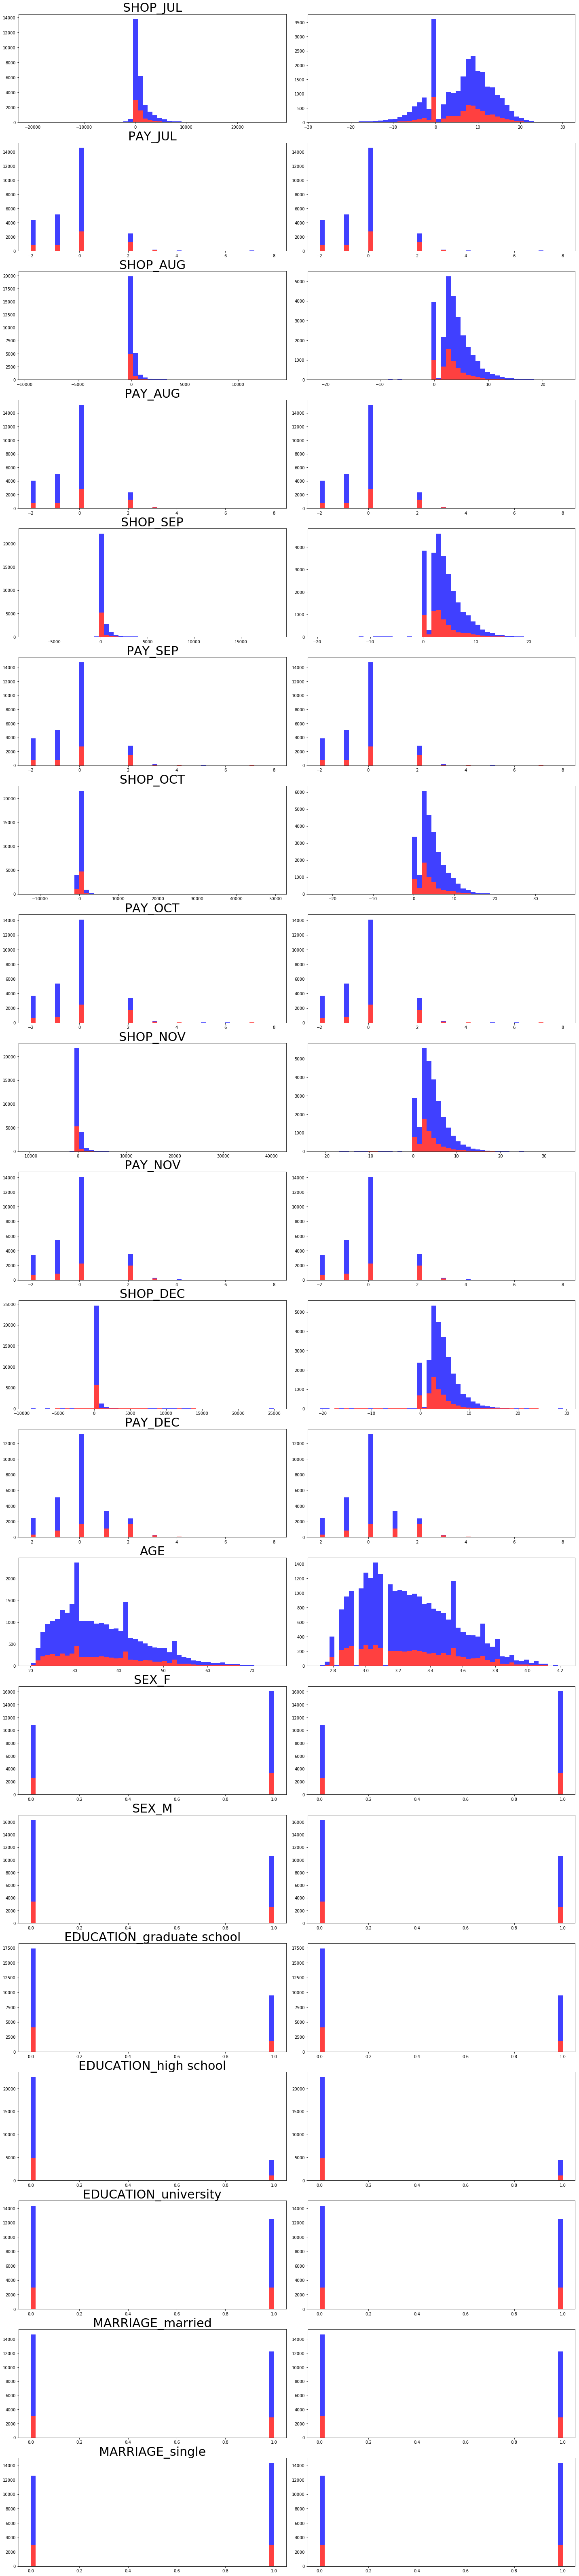

In [456]:
fig, axarr = plt.subplots(20, 2,figsize=(20,100))
ones_mask = (df_target['DEFAULT PAYMENT JAN'] == 1).values
zeros_mask = (df_target['DEFAULT PAYMENT JAN'] == 0).values

for index, col in enumerate(df_data_3.columns):

    axarr[index, 0].set_title(col, size=30)
    ones = df_data_2[col][ones_mask]
    zeros = df_data_2[col][zeros_mask]
    axarr[index, 0].hist((ones, zeros), histtype='barstacked', bins=50, label=('1', '0'), color=('r', 'b'), alpha=0.75)
    ones = df_data_3[col][ones_mask]
    zeros = df_data_3[col][zeros_mask]
    axarr[index, 1].hist((ones, zeros), histtype='barstacked', bins=50, label=('1', '0'), color=('r', 'b'), alpha=0.75)

fig.tight_layout()
fig.subplots_adjust(top=0.88)
    
plt.show()

In [461]:
df_data_3.head()

,SHOP_JUL,PAY_JUL,SHOP_AUG,PAY_AUG,SHOP_SEP,PAY_SEP,SHOP_OCT,PAY_OCT,SHOP_NOV,PAY_NOV,SHOP_DEC,PAY_DEC,AGE,SEX_F,SEX_M,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_university,MARRIAGE_married,MARRIAGE_single
53613503,8.186404,0,2.751887,2,3.102850,0,2.775308,0,3.099750,0,10.389985,0,3.540762,0,1,0,0,1,0,1
35524089,-2.432879,-2,2.265477,0,8.126352,0,13.809016,0,4.096017,0,3.656673,0,3.207534,0,1,0,0,1,1,0
58777007,-3.663350,-2,0.000000,-2,0.000000,-1,3.613047,-1,13.153356,0,4.057751,0,3.448217,1,0,0,1,0,1,0
26913418,3.325007,-2,4.871628,-2,4.462144,-2,6.009092,-2,4.323093,-2,4.462643,-2,3.391211,1,0,1,0,0,1,0
41993633,0.000000,-1,8.288627,-1,0.000000,-1,3.100784,-1,4.922187,-1,3.079972,-1,3.391211,1,0,1,0,0,1,0


In [462]:
df_data_3.to_csv("../common/albertom/cleaned_step_1_2.csv", index = True)

# Train, Test and Val split:

In [459]:
X = df_data_3.values
y = df_target.values

In [460]:
from sklearn.cross_validation import StratifiedShuffleSplit
sss_1 = StratifiedShuffleSplit(df_target["DEFAULT PAYMENT JAN"], 1, test_size=.15, random_state=0)

for train_index, test_index in sss_1:

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("Train shape: " + str(X_train.shape))
    print("Train target shape: " + str(y_train.shape))
        
    print("Test shape: " + str(X_test.shape))
    print("Test target shape: " + str(y_test.shape))
    
    pd.DataFrame(X_train).to_csv("../common/albertom/new_data/train_test/X_train.csv", index = True)
    pd.DataFrame(y_train).to_csv("../common/albertom/new_data/train_test/y_train.csv", index = True)
        
    pd.DataFrame(X_test).to_csv("../common/albertom/new_data/train_test/X_test.csv", index = True)
    pd.DataFrame(y_test).to_csv("../common/albertom/new_data/train_test/y_test.csv", index = True)

/Users/albertomariopirovano/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Train shape: (22851, 20)
Train target shape: (22851, 2)
Test shape: (4033, 20)
Test target shape: (4033, 2)


In [26]:
from sklearn.cross_validation import StratifiedShuffleSplit
sss_1 = StratifiedShuffleSplit(df_target["DEFAULT PAYMENT JAN"], 1, test_size=.15, random_state=0)

for split_index, test_index in sss_1:

    X_split, X_test = X[split_index], X[test_index]
    y_split, y_test = y[split_index], y[test_index]
    
    sss_2 = StratifiedShuffleSplit(pd.DataFrame(y_split)[0].values, 1, test_size=.15, random_state=0)
    
    for train_index, val_index in sss_2:

        X_train, X_val = X_split[train_index], X_split[val_index]
        y_train, y_val = y_split[train_index], y_split[val_index]

        print("Train shape: " + str(X_train.shape))
        print("Train target shape: " + str(y_train.shape))
        
        print("Test shape: " + str(X_test.shape))
        print("Test target shape: " + str(y_test.shape))
        
        print("Val shape: " + str(X_val.shape))
        print("Val target shape: " + str(y_val.shape))

        pd.DataFrame(X_train).to_csv("../common/albertom/train_test_val_split/X_train.csv", index = True)
        pd.DataFrame(y_train).to_csv("../common/albertom/train_test_val_split/y_train.csv", index = True)
        
        pd.DataFrame(X_test).to_csv("../common/albertom/train_test_val_split/X_test.csv", index = True)
        pd.DataFrame(y_test).to_csv("../common/albertom/train_test_val_split/y_test.csv", index = True)
        
        pd.DataFrame(X_val).to_csv("../common/albertom/train_test_val_split/X_val.csv", index = True)
        pd.DataFrame(y_val).to_csv("../common/albertom/train_test_val_split/y_val.csv", index = True)

        X_train = pd.DataFrame(X_train)
        y_train = pd.DataFrame(y_train)
        
        X_test = pd.DataFrame(X_test)
        y_test = pd.DataFrame(y_test)
        
        X_val = pd.DataFrame(X_val)
        y_val = pd.DataFrame(y_val)
    

/Users/albertomariopirovano/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Train shape: (19423, 87)
Train target shape: (19423, 2)
Test shape: (4033, 87)
Test target shape: (4033, 2)
Val shape: (3428, 87)
Val target shape: (3428, 2)


In [27]:
X_val.head()

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,9.634856,8.382878,8.413033,8.696147,9.017886,9.252007,9.361804,4.472104,4.707903,4.472104,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17.507695,1.476656,1.574811,2.540538,1.434443,0.000000,0.000000,1.574811,2.540538,1.434443,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12.139158,11.879250,11.923661,12.013227,12.045026,11.744630,11.857166,4.000204,5.208719,3.857953,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13.360872,4.122501,4.122501,5.194026,4.122501,4.122501,4.122501,4.122501,5.194026,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.360872,4.332114,3.685432,2.564938,12.250356,12.022104,12.022104,3.685432,2.564938,12.250356,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



# PCA:

In [28]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components = X_train.shape[1])
pca.fit(X_train)
# Calculate cummulate explained variance for selecting number of features
expl_var = np.array(pca.explained_variance_ratio_)
cum_expl_var = np.cumsum(expl_var)
print(cum_expl_var)

[ 0.6633066   0.76185802  0.8160975   0.85112618  0.87922315  0.90231751
  0.9242519   0.9443828   0.96085673  0.96873503  0.97455332  0.97900658
  0.9830746   0.98598345  0.98821276  0.9902991   0.99215501  0.99355728
  0.99444593  0.99521474  0.99596355  0.99649934  0.99696386  0.99734656
  0.99770442  0.9979794   0.99824372  0.99846069  0.99866338  0.99884442
  0.99900391  0.99912449  0.99924314  0.99932709  0.99940774  0.9994846
  0.99955729  0.99961637  0.99967418  0.99972608  0.99976952  0.99981014
  0.99984168  0.99986693  0.99988995  0.99990923  0.99992578  0.99993759
  0.99994778  0.99995641  0.99996338  0.99996903  0.99997438  0.99997846
  0.99998172  0.99998431  0.99998663  0.99998888  0.99999086  0.99999244
  0.99999379  0.99999501  0.99999598  0.99999678  0.99999742  0.99999796
  0.99999837  0.99999872  0.99999894  0.99999915  0.99999933  0.9999995
  0.99999966  0.99999981  0.99999992  0.99999997  1.          1.          1.
  1.          1.          1.          1.         

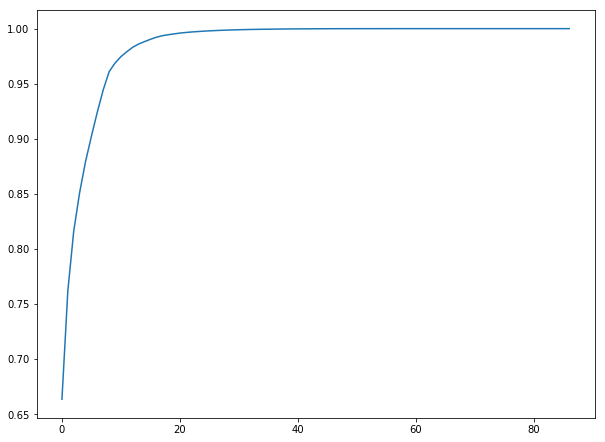

In [29]:
# Plot cummulate explained variance
x = np.arange(cum_expl_var.shape[0])
y = cum_expl_var
plt.plot(x,y)

In [31]:
def num_components(cum_var, thrs):
    return (cum_var < thrs).sum()

In [32]:
print(num_components(cum_expl_var, 0.94))
print(num_components(cum_expl_var, 0.95))
print(num_components(cum_expl_var, 0.96))
print(num_components(cum_expl_var, 0.97))
print(num_components(cum_expl_var, 0.98))
print(num_components(cum_expl_var, 0.99))

7
8
8
10
12
15


# Generate PCA transformed X_train and X_test:

In [33]:
# Apply PCA on the selected number of components
pca = PCA(n_components = num_components(cum_expl_var, 0.99))
pca.fit(X_train)
expl_var = np.array(pca.explained_variance_ratio_)
cum_expl_var = np.cumsum(expl_var)
print(cum_expl_var)

[ 0.6633066   0.76185802  0.8160975   0.85112618  0.87922315  0.90231751
  0.9242519   0.9443828   0.96085673  0.96873503  0.97455332  0.97900658
  0.9830746   0.98598345  0.98821276]


In [34]:
# Create datafrae with the transformed data
x_train_trasf = pca.fit_transform(X_train)
x_test_trasf = pca.fit_transform(X_test)
x_val_trasf = pca.fit_transform(X_val)

df_data_train_1 = pd.DataFrame(x_train_trasf)
df_data_test_1 = pd.DataFrame(x_test_trasf)
df_data_val_1 = pd.DataFrame(x_val_trasf)

In [35]:
print(df_data_train_1.shape)
df_data_train_1.head()

(19423, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-18.341700,-1.499321,-1.355711,4.085164,0.507722,1.323943,-1.158738,3.239028,-0.351744,4.684860,-1.288305,-0.614564,-1.519187,1.272009,0.056802
1,19.524442,-2.030392,-0.674545,-3.829560,0.021374,-3.275420,1.350335,1.898675,0.694699,-2.756291,-0.794842,1.239967,1.987568,1.351527,0.320140
2,0.877070,-5.641901,3.048596,1.115479,0.016561,0.644258,-0.395762,0.024898,0.223658,0.744945,0.004950,-0.120814,-0.338179,0.930984,0.727694
3,-5.824436,-7.146028,2.308765,1.485002,1.753751,0.034794,0.535366,-0.180122,1.468998,2.604550,0.730249,-0.127980,0.202259,0.150690,0.239654
4,-5.021571,4.583527,-3.234845,2.983661,-2.991689,-1.813864,1.493669,-2.691452,-2.037845,2.800192,-1.108048,0.335992,-0.956529,0.222923,0.469923


In [36]:
print(df_data_test_1.shape)
df_data_test_1.head()

(4033, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.718190,-6.316477,-2.083559,0.975329,-0.296123,1.974713,0.379124,-0.007346,1.958610,-1.165545,0.759267,-0.382960,-0.584108,1.553068,0.568155
1,0.020365,-0.602705,9.139554,0.840974,0.546386,-5.230693,-0.084946,-10.231455,-0.852961,0.451182,0.669967,-0.829130,1.024189,0.229777,0.039074
2,9.975737,-3.348945,-0.572407,0.087099,0.788437,0.297061,0.889188,0.581228,-0.122152,-0.471265,0.488114,-0.081484,-0.171997,-0.577768,-0.305709
3,-22.105474,0.258111,0.720882,-3.436382,-1.524025,0.087214,-0.444141,0.608868,1.049485,0.409754,-0.329481,-0.048179,-0.009104,-0.527232,1.436285
4,-14.011642,2.771666,-3.670775,-0.453639,-0.303950,-1.095188,-2.580395,-1.656323,-1.115220,0.806741,-0.176124,0.275889,-0.784059,1.083727,-1.022582


In [37]:
print(df_data_val_1.shape)
df_data_val_1.head()

(3428, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.121868,-4.745601,-3.924026,2.321226,1.560214,0.136213,0.058430,-0.207562,0.129703,0.631256,-0.073079,-0.072597,-0.046537,-1.095476,0.020630
1,-18.892884,1.320438,2.465213,-0.328190,-2.543895,0.728472,-1.207503,1.209443,0.543729,0.205444,0.680009,-0.282380,-0.080302,0.704979,0.989506
2,8.413480,-3.967846,-1.918874,0.249799,0.485784,0.726944,-0.507952,-0.138389,0.109414,0.208978,-0.092068,0.341340,-0.376661,-0.591347,0.472876
3,-10.221737,-0.903182,-1.343646,1.040087,2.489991,2.670366,-0.744474,2.248467,-0.269104,-0.410595,-1.574587,0.339107,-0.976277,0.889252,1.044321
4,-1.601570,0.028557,-10.087533,2.789941,-7.033029,-5.960131,0.690240,-2.786239,2.339409,5.522192,1.373145,0.145312,0.697188,0.479149,1.207729


In [38]:
df_data_train_1.describe().round(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,19423.000,19423.000,19423.000,19423.000,19423.000,19423.000,19423.000,19423.000,19423.000,19423.000,19423.000,19423.000,19423.000,19423.000,19423.000
mean,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000
std,12.887,4.967,3.685,2.961,2.652,2.405,2.343,2.245,2.031,1.404,1.207,1.056,1.009,0.853,0.747
min,-44.572,-11.167,-24.821,-14.821,-21.451,-21.175,-18.418,-18.633,-14.655,-11.720,-12.587,-6.915,-9.935,-2.033,-1.842
25%,-9.740,-4.107,-1.705,-1.856,-1.048,-0.894,-0.793,-0.789,-1.003,-0.596,-0.469,-0.412,-0.408,-0.640,-0.396
50%,-0.655,-0.286,0.264,-0.265,0.124,0.070,-0.046,0.062,0.118,0.044,0.045,0.018,-0.024,-0.191,-0.112
75%,8.402,3.616,2.042,1.537,1.275,0.809,0.847,0.856,0.944,0.603,0.466,0.425,0.420,0.594,0.248
max,58.119,23.352,27.018,31.006,24.069,25.712,24.463,24.679,18.952,13.753,15.267,12.401,12.574,3.237,3.914


In [39]:
df_data_train_1.to_csv("../common/albertom/train_test_val_split/X_train_pca.csv")
df_data_test_1.to_csv("../common/albertom/train_test_val_split/X_test_pca.csv")
df_data_val_1.to_csv("../common/albertom/train_test_val_split/X_val_pca.csv")

# Plot PCA features distribution over samples:

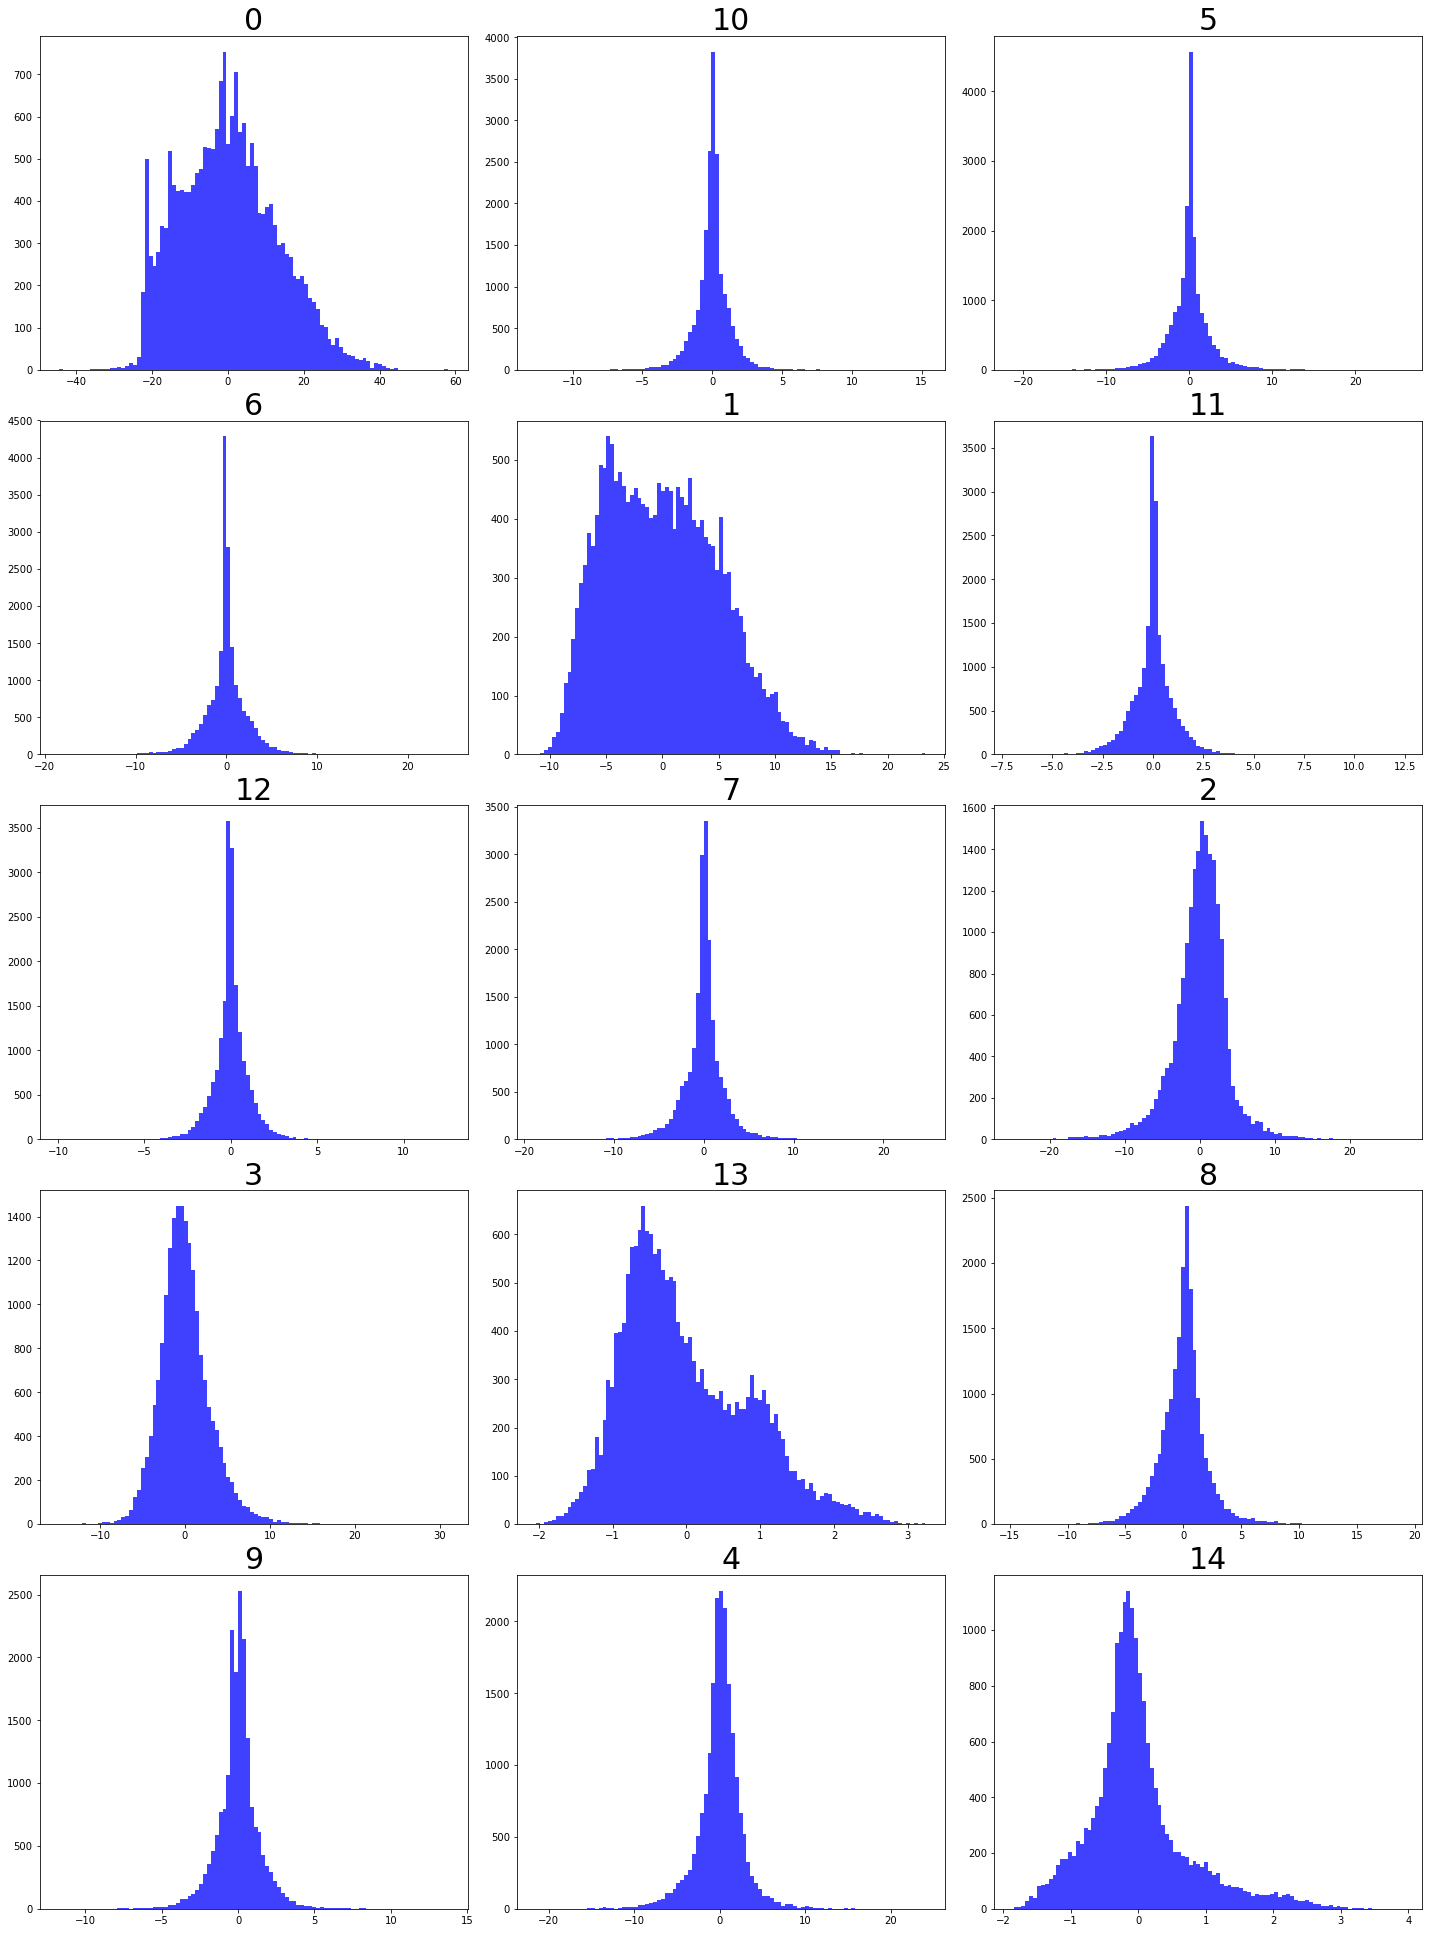

In [41]:
fig, axarr = plt.subplots(5, 3,figsize=(20, 30))

for index, col in enumerate(df_data_train_1.columns.values):

    i = index%5
    j = index%3
    axarr[i, j].set_title(col, size=30)
    axarr[i, j].hist(df_data_train_1[col].values, 100, facecolor='blue', alpha=0.75)

fig.tight_layout()
fig.subplots_adjust(top=0.88)
    
plt.show()

# Visualize data in the first 3 principal components (81% variance):

In [42]:
# Apply PCA on the selected number of components
pca = PCA(n_components = num_components(cum_expl_var, 0.81652937))
pca.fit(X_train)
expl_var = np.array(pca.explained_variance_ratio_)
cum_expl_var = np.cumsum(expl_var)
print(cum_expl_var)

# Create datafrae with the transformed data
x_train_trasf_visual = pca.fit_transform(X_train)

df_data_train_visual = pd.DataFrame(x_train_trasf_visual)
df_data_train_visual.head()

[ 0.6633066   0.76185802  0.8160975 ]


,0,1,2
0,-18.341700,-1.499321,-1.355711
1,19.524442,-2.030392,-0.674545
2,0.877070,-5.641901,3.048596
3,-5.824436,-7.146028,2.308765
4,-5.021571,4.583527,-3.234845


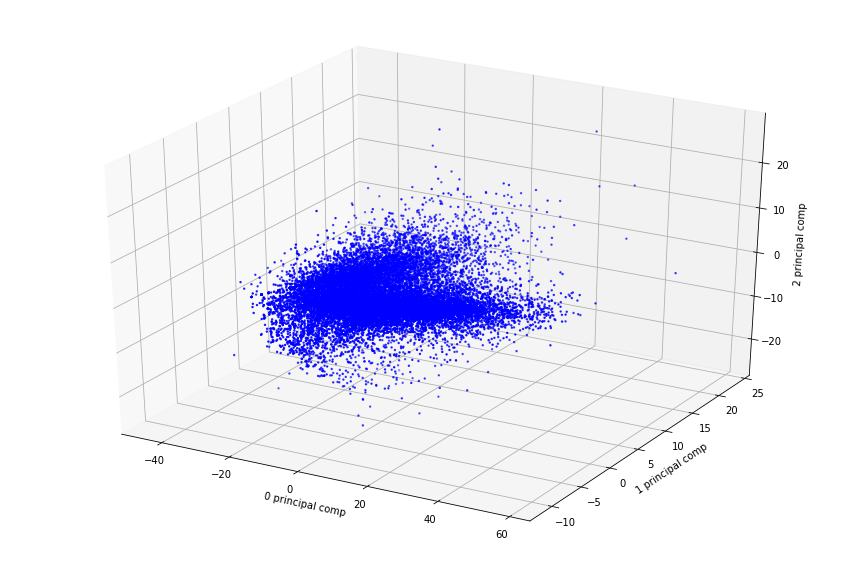

In [58]:
plt.rcParams['figure.figsize'] = (15.0, 10)
df_test = df_data_train_visual
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = df_test[0].values
Y = df_test[1].values
Z = df_test[2].values
colors = {0:'blue', 1:'red'}

ax.scatter(X, Y, Z, c=df_target["DEFAULT PAYMENT JAN"].apply(lambda x: colors[x]), s=2)
ax.set_xlabel('0 principal comp')
ax.set_ylabel('1 principal comp')
ax.set_zlabel('2 principal comp')

plt.show()